#  GCNs to classify nodes in many small graphs.

https://github.com/rusty1s/pytorch_geometric/issues/824

In [1]:
!python -c "import torch; print(torch.version.cuda)"
!python -c "import torch; print(torch.__version__)"
!nvidia-smi
!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install torch-geometric
!pip install torch-scatter==latest+cu101 torch-sparse==latest+cu101 -f https://pytorch-geometric.com/whl/torch-1.7.0.html

10.1
1.7.0+cu101
NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

Looking in links: https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
     |████████████████████████████████| 11.9MB 12.6MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
     |████████████████████████████████| 24.3MB 1.3MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
     |████████████████████████████████| 21.5MB 1.2MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
     |████████████████████████████████| 6.4MB 14.1MB/s 
     |████████████████████████████████| 194kB 12.1MB/s 
     |████████████████████████████████| 235kB 22.1MB/s 
     |████████████████████████████████| 2.2MB 22.8MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-1.6.3-cp36-none-any.whl size=

In [58]:
import torch
from torch_geometric.data import Data

dataset = []

# To add weights on edges
# https://pytorch-geometric.readthedocs.io/en/latest/modules/utils.html#torch_geometric.utils.add_self_loops
# https://github.com/rusty1s/pytorch_geometric/issues/1739

In [59]:
# G1
x_1 = torch.tensor([[12,5,1,1,1,0,1,1,1,0], [2,10,0,0,1,0,0,1,1,0], [8,5,0,1,0,1,0,0,1,0,], [1,5,0,1,0,0,1,0,1,0], [1,15,0,1,0,0,1,0,1,0]], dtype=torch.float)
y_1 = torch.tensor([0,2,1,3,3], dtype= torch.long)

edge_index_1 = torch.tensor([[0,1,  0,2, 0,4, 4,3, 0,3  ],
                            [ 1,0,  2,0, 4,0, 3,4, 3,0 ]], dtype=torch.long)

train_mask = torch.tensor([True,True,True,True,False])
test_mask = torch.tensor([False,False,False,False, True])

data_1 = Data(x=x_1, y=y_1, edge_index=edge_index_1, train_mask = train_mask, test_mask =test_mask)
dataset.append(data_1)
data_1

Data(edge_index=[2, 10], test_mask=[5], train_mask=[5], x=[5, 10], y=[5])

In [60]:
# G2
x_2 = torch.tensor([[12,5,1,1,1,0,1,1,1,0], [3,10,0,0,1,0,0,1,1,0], [8,5,0,1,0,1,0,0,1,0,], [1,5,0,1,0,0,1,0,1,0], [1,15,0,1,0,0,1,0,1,0]], dtype=torch.float)
y_2 = torch.tensor([0,2,1,3,3], dtype= torch.long)

edge_index_2 = torch.tensor([[0,1,  0,2, 0,4, 4,3, 0,3  ],
                            [ 1,0,  2,0, 4,0, 3,4, 3,0 ]], dtype=torch.long)


train_mask = torch.tensor([True,True,True,True,False])
test_mask = torch.tensor([False,False,False,False, True])

data_2 = Data(x=x_2, y=y_2, edge_index=edge_index_2, train_mask = train_mask, test_mask =test_mask)
dataset.append(data_2)
data_2

Data(edge_index=[2, 10], test_mask=[5], train_mask=[5], x=[5, 10], y=[5])

In [61]:
# G3
x_3 = torch.tensor([[14,5,1,1,0,0,1,0,1,0], [8,5,0,1,0,1,0,0,1,0,], [1,5,0,1,0,0,1,0,1,0], [1,15,0,1,0,0,1,0,1,0], [1,5,0,0,1,0,1,0,1,0] ], dtype=torch.float)
y_3 = torch.tensor([0,1,3,3,3], dtype= torch.long)

edge_index_3 = torch.tensor([[0,1,  0,2, 0,4, 4,3, 2,3, ],
                            [ 1,0,  2,0, 4,0, 3,4, 3,2, ]], dtype=torch.long)


train_mask = torch.tensor([True,True,True,True,False])
test_mask = torch.tensor([False,False,False,False, True])

data_3 = Data(x=x_3, y=y_3, edge_index=edge_index_3, train_mask = train_mask, test_mask =test_mask)
dataset.append(data_3)
data_3

Data(edge_index=[2, 10], test_mask=[5], train_mask=[5], x=[5, 10], y=[5])

In [62]:
#G4
x_4 = torch.tensor([[14,5,1,0,0,0,1,0,1,0], [8,5,0,1,0,1,0,0,1,0,], [1,10,0,1,0,0,1,0,1,0],[1,15,0,1,0,0,1,0,1,0] ], dtype=torch.float)
y_4 = torch.tensor([0,1,3,3], dtype= torch.long)


edge_index_4 = torch.tensor([[0,1,  1,2, 2,3, 3,0],
                            [ 1,0,  2,1, 3,2, 0,3]], dtype=torch.long)


train_mask = torch.tensor([True,True,True,False])
test_mask = torch.tensor([False,True,False, False])

data_4 = Data(x=x_4, y=y_4, edge_index=edge_index_4, train_mask = train_mask, test_mask =test_mask)
dataset.append(data_4)


In [48]:
#G5
x_5 = torch.tensor([[14,5,1,0,0,0,1,0,1,0], [8,5,0,1,0,1,0,0,1,0,], [1,10,0,1,0,0,1,0,1,0],[1,15,0,1,0,0,1,0,1,0] ], dtype=torch.float)
y_5 = torch.tensor([0,1,3,3], dtype= torch.long)


edge_index_5 = torch.tensor([[0,1,  1,2, 2,3, 3,0],
                            [ 1,0,  2,1, 3,2, 0,3]], dtype=torch.long)


train_mask = torch.tensor([False,False, False,False])
test_mask = torch.tensor([True,True, True, True])

data_5 = Data(x=x_5, y=y_5, edge_index=edge_index_5, train_mask = train_mask, test_mask =test_mask)
dataset.append(data_5)


In [63]:
from torch_geometric.data import DataLoader

train_loader = DataLoader(dataset, batch_size=1, shuffle=True)

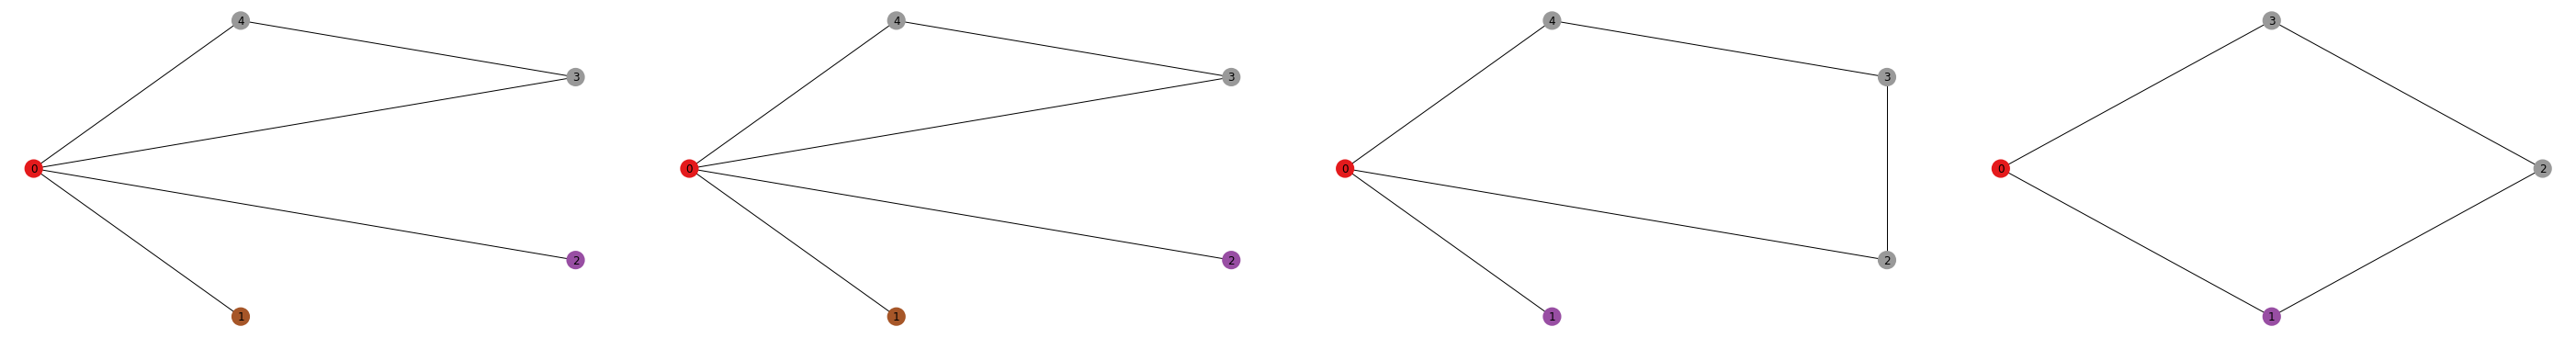

In [64]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils.convert import to_networkx

_ = plt.figure(1,figsize=(50,30)) 

for i in range(4):
  graph = to_networkx(dataset[i])
  graph = graph.to_undirected()
  node_labels = dataset[i].y[list(graph.nodes)].numpy()

  _ = plt.subplot(4, 4, i+1)
  _ = plt.subplots_adjust(wspace = 0.1, hspace=0.2)
  _ = nx.draw_shell(graph,with_labels=True, cmap=plt.get_cmap('Set1'),node_color = node_labels,node_size=200,linewidths=6)

In [65]:
print()
print(f'Dataset: {dataset}:')
print('====================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset[0].num_features}')

data = dataset[3]  # Get the first graph object.

print()
print(data)
print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Dataset: [Data(edge_index=[2, 10], test_mask=[5], train_mask=[5], x=[5, 10], y=[5]), Data(edge_index=[2, 10], test_mask=[5], train_mask=[5], x=[5, 10], y=[5]), Data(edge_index=[2, 10], test_mask=[5], train_mask=[5], x=[5, 10], y=[5]), Data(edge_index=[2, 8], test_mask=[4], train_mask=[4], x=[4, 10], y=[4])]:
Number of graphs: 4
Number of features: 10

Data(edge_index=[2, 8], test_mask=[4], train_mask=[4], x=[4, 10], y=[4])
Number of nodes: 4
Number of edges: 8
Average node degree: 2.00
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


In [66]:
import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.nn import GCNConv

torch.manual_seed(42) # the seed ensures that the numbers are reproducible

class Net(torch.nn.Module):
    def __init__(self, ):
        super(Net, self).__init__()

        # Initialize layers
        self.conv1 = GCNConv(10, 50)
        self.conv2 = GCNConv(50, 16)
        self.out = Linear(16, 4)

    def forward(self, x, edge_index): # x -> node features , 
                                      # edge_index -> edge connectivity,
                                      #               adjacency info

        # Layer 1 
        x = self.conv1(x, edge_index)  
        x = F.relu(x)
        x = F.dropout(x, p= 0.4, training=self.training)

        # Layer 2
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.4, training=self.training)
        
        # Linear Layer
        x = self.out(x)
        x = F.softmax(x, dim=1)
        return  x



In [67]:
model = Net()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

In [68]:
print(model)

Net(
  (conv1): GCNConv(10, 50)
  (conv2): GCNConv(50, 16)
  (out): Linear(in_features=16, out_features=4, bias=True)
)


In [69]:
# Loss Function
# https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
criterion = torch.nn.CrossEntropyLoss()

In [70]:
losses = []
acc_test = []

for epoch in range(0,50):
  model.train()
  optimizer.zero_grad()
  temp = []
  for i,data in enumerate(train_loader):                                                    # Iterate in batches over the training dataset.
        out = model(data.x, data.edge_index)        
        loss = criterion(out[data.train_mask], data.y[data.train_mask])                     # Compute the loss.
        loss.backward()                                                                     # Derive gradients.
        optimizer.step()                                                                    # Update parameters based on gradients.
        optimizer.zero_grad()                                                               # Clear gradients.
        temp.append(loss)
        if(epoch == 49):
          print(data)
          print(out)
          print('')
  losses.append( sum(temp)/ len(temp))

  model.eval()
  correct = 0

Batch(batch=[5], edge_index=[2, 10], test_mask=[5], train_mask=[5], x=[5, 10], y=[5])
tensor([[0.2621, 0.5337, 0.1250, 0.0791],
        [0.2035, 0.1708, 0.1664, 0.4592],
        [0.0943, 0.8969, 0.0044, 0.0044],
        [0.0229, 0.0104, 0.0160, 0.9507],
        [0.1290, 0.0600, 0.0687, 0.7423]], grad_fn=<SoftmaxBackward>)

Batch(batch=[5], edge_index=[2, 10], test_mask=[5], train_mask=[5], x=[5, 10], y=[5])
tensor([[2.6128e-01, 7.1507e-01, 1.9254e-02, 4.4027e-03],
        [8.3318e-02, 9.1664e-01, 4.1519e-05, 1.1396e-06],
        [8.0337e-02, 7.0921e-02, 7.6238e-02, 7.7250e-01],
        [5.9591e-03, 7.3899e-04, 1.1787e-03, 9.9212e-01],
        [2.4836e-03, 4.8245e-04, 5.9726e-04, 9.9644e-01]],
       grad_fn=<SoftmaxBackward>)

Batch(batch=[5], edge_index=[2, 10], test_mask=[5], train_mask=[5], x=[5, 10], y=[5])
tensor([[0.4412, 0.5044, 0.0256, 0.0288],
        [0.3093, 0.3348, 0.1631, 0.1928],
        [0.1899, 0.7775, 0.0074, 0.0251],
        [0.0119, 0.0047, 0.0086, 0.9748],
        [

In [ ]:
# losses

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


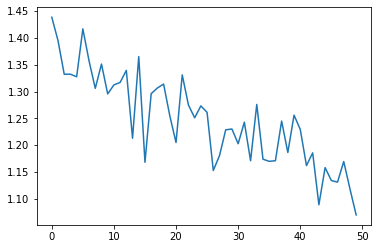

In [72]:
import seaborn as sns
losses_float = [float(loss.cpu().detach().numpy()) for loss in losses] 
loss_indices = [i for i,l in enumerate(losses_float)] 
plt = sns.lineplot(loss_indices, losses_float)
plt

In [73]:
import pandas as pd 

model.eval()

for data in train_loader:
  # Analyze the results for one batch
  with torch.no_grad():
    pred = model(data.x, data.edge_index)   
    pred = pred[data.test_mask].max(1)[1]

  print("Predict: %s Real: %s\n"  % ( pred, data.y[data.test_mask]))

Predict: tensor([3]) Real: tensor([3])

Predict: tensor([1]) Real: tensor([1])

Predict: tensor([3]) Real: tensor([3])

Predict: tensor([3]) Real: tensor([3])



In [74]:
data

Batch(batch=[5], edge_index=[2, 10], test_mask=[5], train_mask=[5], x=[5, 10], y=[5])

In [75]:
data.y

tensor([0, 2, 1, 3, 3])

In [77]:
data = data_5
with torch.no_grad():
  pred = model(data.x, data.edge_index)   
  pred = pred[data.test_mask].max(1)[1]
pred

tensor([1, 1, 3, 3])